<a href="https://colab.research.google.com/github/hadil1999-creator/Sentiment-Analysis-project/blob/main/This_Sentiment_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import tensorflow as tf
import os
import PIL
import PIL.Image




In [ ]:
print(tf.__version__)

2.8.0


In [ ]:
! pip install kaggle

In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/


In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download -d jonathanoheix/face-expression-recognition-dataset

 99% 119M/121M [00:00<00:00, 237MB/s] 
100% 121M/121M [00:00<00:00, 233MB/s]


In [ ]:
!unzip face-expression-recognition-dataset.zip


Streaming output truncated to the last 5000 lines.
  inflating: images/validation/fear/8797.jpg  
  inflating: images/validation/fear/8818.jpg  
  inflating: images/validation/fear/886.jpg  
  inflating: images/validation/fear/9037.jpg  
  inflating: images/validation/fear/9040.jpg  
  inflating: images/validation/fear/9101.jpg  
  inflating: images/validation/fear/911.jpg  
  inflating: images/validation/fear/9179.jpg  
  inflating: images/validation/fear/9205.jpg  
  inflating: images/validation/fear/9232.jpg  
  inflating: images/validation/fear/9251.jpg  
  inflating: images/validation/fear/9261.jpg  
  inflating: images/validation/fear/9281.jpg  
  inflating: images/validation/fear/9302.jpg  
  inflating: images/validation/fear/9333.jpg  
  inflating: images/validation/fear/9369.jpg  
  inflating: images/validation/fear/9370.jpg  
  inflating: images/validation/fear/9474.jpg  
  inflating: images/validation/fear/949.jpg  
  inflating: images/validation/fear/9602.jpg  
  inflating:

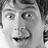

In [ ]:
from IPython.display import Image 
pil_img = Image(filename='images/validation/surprise/993.jpg')
display(pil_img)



In [ ]:
!rm -rf images/train/disgust

In [ ]:
!rm -rf images/train/neutral

In [ ]:
!rm -rf images/validation/neutral
!rm -rf images/validation/disgust

In [ ]:
!rm -rf images/images

In [ ]:
from tensorflow.keras.preprocessing import image_dataset_from_directory
image_size = (48,48)
batch_size = 32
train_data = image_dataset_from_directory('images/train', subset='training', validation_split=0.2, seed = 1000,image_size=image_size, batch_size = batch_size,color_mode='rgb')

Found 23403 files belonging to 5 classes.
Using 18723 files for training.


In [ ]:
validation_data = image_dataset_from_directory('images/train',subset='validation', validation_split=0.2, seed = 1000,image_size=image_size, batch_size = batch_size,color_mode='rgb')

Found 23403 files belonging to 5 classes.
Using 4680 files for validation.


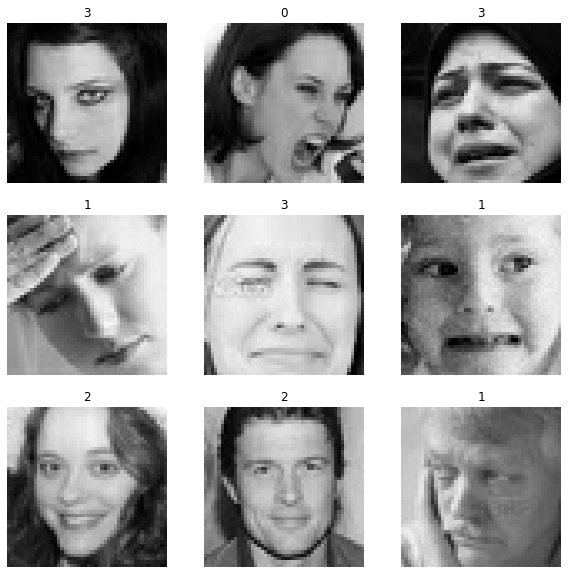

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
for images, labels in train_data.take(1):
  for i in range(9):
     ax = plt.subplot(3,3, i+1)
     plt.imshow(images[i].numpy().astype("uint8"))
     plt.title(int(labels[i]))
     plt.axis("off")

In [ ]:
switcher={
    0: 'anger',
    1 : 'fear',
    2: 'happy',
    3:'sad',
  
    4:'surprise',
  }
def index_to_class(n):
  return(switcher.get(n))

In [ ]:
img=[]
lab=[]
for images, labels in train_data.take(1):
  for i in range(len(images)):
    img.append(images[i].numpy().astype("uint8"))
    lab.append(index_to_class((int(labels[i]))))

(48, 48, 3)

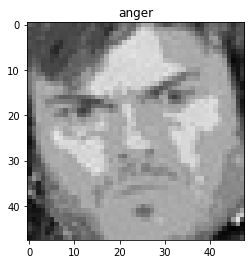

In [ ]:
plt.imshow(img[i])
plt.title(lab[i])
img[i].shape

In [ ]:
import cv2
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
from keras.models import Sequential
from keras.layers.core import Flatten, Dense, Dropout
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D

In [ ]:
from tensorflow.keras import layers, models
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(5))

In [ ]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_45 (Conv2D)          (None, 46, 46, 32)        896       
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 23, 23, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_46 (Conv2D)          (None, 21, 21, 64)        18496     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 10, 10, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_47 (Conv2D)          (None, 8, 8, 64)          36928     
                                                                 
 flatten_2 (Flatten)         (None, 4096)             

In [ ]:
model.compile(loss="mse" ,optimizer= RMSprop(learning_rate=0.001), metrics=['accuracy'])


In [ ]:
es = tf.keras.callbacks.EarlyStopping(monitor='accuracy', verbose=1)
model_fit = model.fit(train_data, epochs=30)  


Epoch 1/30
586/586 [==============================] - 12s 18ms/step - loss: 37.0985 - accuracy: 0.2035
Epoch 2/30
586/586 [==============================] - 11s 19ms/step - loss: 1.7071 - accuracy: 0.2095
Epoch 3/30
586/586 [==============================] - 11s 19ms/step - loss: 1.5522 - accuracy: 0.1876
Epoch 4/30
586/586 [==============================] - 11s 18ms/step - loss: 1.4689 - accuracy: 0.1874
Epoch 5/30
586/586 [==============================] - 11s 18ms/step - loss: 1.3953 - accuracy: 0.1943
Epoch 6/30
586/586 [==============================] - 10s 17ms/step - loss: 1.3267 - accuracy: 0.1920
Epoch 7/30
586/586 [==============================] - 10s 17ms/step - loss: 1.2553 - accuracy: 0.1900
Epoch 8/30
586/586 [==============================] - 11s 18ms/step - loss: 1.1762 - accuracy: 0.1943
Epoch 9/30
586/586 [==============================] - 10s 18ms/step - loss: 1.1115 - accuracy: 0.1892
Epoch 10/30
586/586 [==============================] - 10s 18ms/step - loss: 1.04

In [ ]:
loss_and_metrics = model.evaluate(validation_data)
print(loss_and_metrics)

147/147 [==============================] - 2s 14ms/step - loss: 1.4907 - accuracy: 0.1267
[1.490678071975708, 0.12670940160751343]


In [ ]:
#classes = validation.class_names
#class_to_index = dict((c,i) for i, c in enumerate(classes))
#class_to_index


In [ ]:
def predictFromImagePath(img_path):
    img = image.load_img(img_path, target_size=(100,100))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    print(x.shape)

    return predictFromImage(image)

In [ ]:
img_path = '/content/images/100.jpg'
def predictFromImage(img_path):

    categ = model.predict(image)
    print(categ)

    return predictFromImage(img_path)


In [ ]:
import numpy as np
from PIL import Image
image = cv2.imread('/content/images/test/fear/10029.jpg')
image.shape
image.resize(48,48,3)
image.shape
np_array_image = np.array(image)
my_image=cv2.resize(np_array_image,(image_size))
label = model.predict(my_image)


